In [1]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df_stats = tfdv.generate_statistics_from_dataframe(df)
tfdv.visualize_statistics(df_stats)

In [5]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((1070, 7), (268, 7))

In [6]:
train_stats = tfdv.generate_statistics_from_dataframe(train)
train_schema = tfdv.infer_schema(train_stats)
test_stats = tfdv.generate_statistics_from_dataframe(test)
tfdv.visualize_statistics(lhs_statistics=train_stats, rhs_statistics=test_stats, lhs_name='Train', rhs_name='Test')

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()
X_train, y_train = train.drop(columns=['charges','sex', 'smoker', 'region']), train.charges
X_train, y_train
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.1254047931103025

In [9]:
X_test, y_test = test.drop(columns=['charges', 'sex', 'smoker', 'region']), test.charges
reg.score(X_test, y_test)

0.09733096540327324

In [10]:
df_with_dummies = pd.get_dummies(df, drop_first=True)
df_with_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [11]:
X, y = df_with_dummies.drop(columns=['charges']), df_with_dummies.charges
X, y

(      age     bmi  children  sex_male  smoker_yes  region_northwest  \
 0      19  27.900         0         0           1                 0   
 1      18  33.770         1         1           0                 0   
 2      28  33.000         3         1           0                 0   
 3      33  22.705         0         1           0                 1   
 4      32  28.880         0         1           0                 1   
 ...   ...     ...       ...       ...         ...               ...   
 1333   50  30.970         3         1           0                 1   
 1334   18  31.920         0         0           0                 0   
 1335   18  36.850         0         0           0                 0   
 1336   21  25.800         0         0           0                 0   
 1337   61  29.070         0         0           1                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.7466473482925015, 0.7609509307430193)

In [14]:
X_train.columns, reg.coef_

(Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
        'region_southeast', 'region_southwest'],
       dtype='object'),
 array([  241.43423032,   367.28318761,   443.786471  ,  -110.54724611,
        23466.42401427,  -588.16503587, -1501.51143289, -1467.02307758]))

# increase training data size

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_sizes, scores, errors = [], [], []
for i in range(100, len(X), 100):
    X_train = X.iloc[0:i, :]
    y_train = y[0:i]
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    train_error = mean_absolute_error(y_train, y_train_pred)
    test_error = mean_absolute_error(y_test, y_test_pred) 
    score = reg.score(X_train, y_train), reg.score(X_test, y_test)
    errors.append((train_error, test_error))
    train_sizes.append(i)
    scores.append(score)
    print(i, score)
print(errors)

100 (0.8258625466129714, 0.7442070889992571)
200 (0.783562240845209, 0.7609651311784442)
300 (0.7756888627237354, 0.7658801251615578)
400 (0.7599622521128109, 0.7694005936548778)
500 (0.7515129879341648, 0.7667237045775355)
600 (0.7407926122632225, 0.767223477783986)
700 (0.7537770852232211, 0.7686072161835156)
800 (0.7535625496483694, 0.7678226719464094)
900 (0.7622140158322953, 0.7673993956949846)
1000 (0.7568890683842895, 0.7667792535106535)
1100 (0.751442120697244, 0.7666110823733756)
1200 (0.7492895293005886, 0.7665901640588801)
1300 (0.753218237376768, 0.7679330933180567)
[(4100.961095917499, 4505.658376914935), (3930.664638964748, 4217.419613256411), (4207.461605394788, 4220.5470537680785), (4247.226791951966, 4185.220906361755), (4157.2847271483415, 4188.6167702786925), (4276.546413761796, 4223.110090513008), (4191.702750814493, 4175.282782978782), (4088.247289754277, 4158.416775353203), (4034.989719774205, 4162.990576069285), (4039.850826966484, 4178.493479288231), (4126.10214

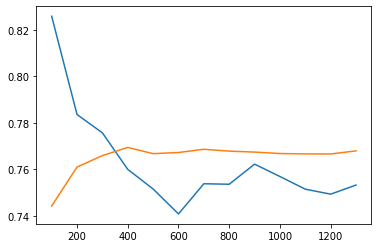

In [16]:
plt.plot(train_sizes, scores)

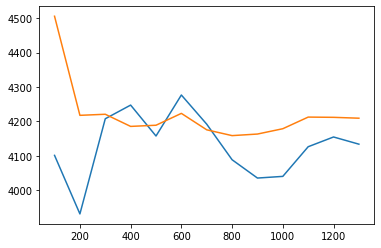

In [17]:
plt.plot(train_sizes, errors)

# Scaled

In [18]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
X_scaled = pd.DataFrame(scale.transform(X), columns=X.columns)

In [19]:
reg = LinearRegression()
reg.fit(X_scaled, y)
reg.score(X_scaled, y)
y_pred = reg.predict(X_scaled)
mean_absolute_error(y, y_pred)

4170.886894163591

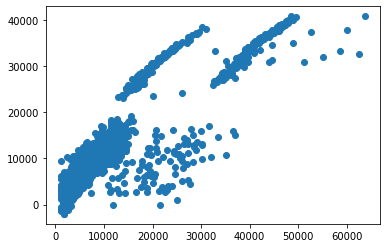

In [20]:
plt.scatter(y,y_pred)

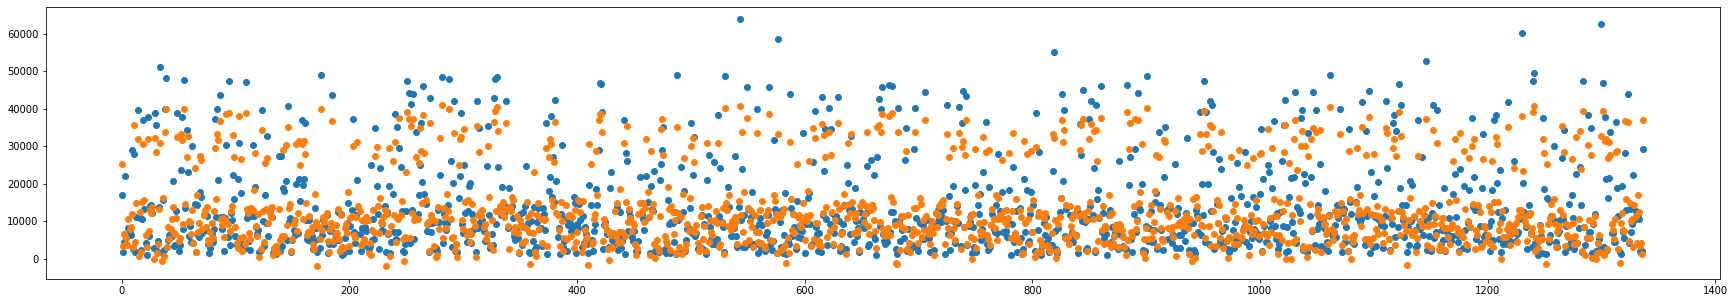

In [21]:
plt.figure(figsize=(30,5))
plt.scatter(range(len(y)), y)
plt.scatter(range(len(y_pred)), y_pred)

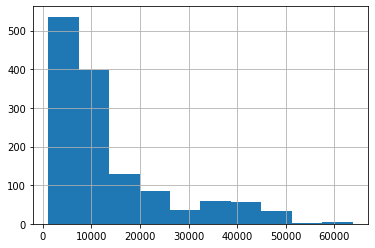

In [22]:
y.hist()

# remove high priced house as outlier and try

In [23]:
df_lt_50t = df_with_dummies[df_with_dummies.charges < 50000]
X_train, y_train = df_lt_50t.drop(columns=['charges']), df_lt_50t.charges
X_train.shape, y_train.shape

((1331, 8), (1331,))

In [24]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)

In [25]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_train_scaled)
mean_absolute_error(y_train, y_pred)

4051.3242837137113

# try more features like log or polynomial

In [26]:
# df_with_dummies['age_log'] = 
# df_with_dummies['age'].apply(log)
df_with_dummies[['age','bmi']]

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(2)
df_poly_features = pd.DataFrame(poly.fit_transform(df_with_dummies[['age','bmi']]), columns = ['one', 'age', 'bmi', 'age*2', 'age*bmi', 'bmi*2'])
df_with_poly = df_with_dummies.merge(df_poly_features)

In [29]:
X_train, y_true = df_with_poly.drop(columns=['charges']), df_with_poly.charges
X_train.shape, y_true.shape

((1426, 12), (1426,))

In [30]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,one,age*2,age*bmi,bmi*2
0,-1.419387,-0.460792,-0.915625,-1.014125,1.970675,-0.573571,-0.620053,1.801124,0.0,-1.207110,-1.301404,-0.519273
1,-1.490444,0.518431,-0.079186,0.986072,-0.507440,-0.573571,1.612765,-0.555209,0.0,-1.240043,-1.150908,0.431565
2,-0.779878,0.389981,1.593692,0.986072,-0.507440,-0.573571,1.612765,-0.555209,0.0,-0.830595,-0.539050,0.296524
3,-0.779878,0.389981,1.593692,0.986072,-0.507440,-0.573571,1.612765,-0.555209,0.0,-0.830595,-0.539050,0.296524
4,-0.779878,0.389981,0.757253,-1.014125,-0.507440,-0.573571,1.612765,-0.555209,0.0,-0.830595,-0.539050,0.296524


In [31]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_true)
y_pred = reg.predict(X_train_scaled)
mean_absolute_error(y_true, y_pred)

4193.0818362061445

In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
import seaborn as sns

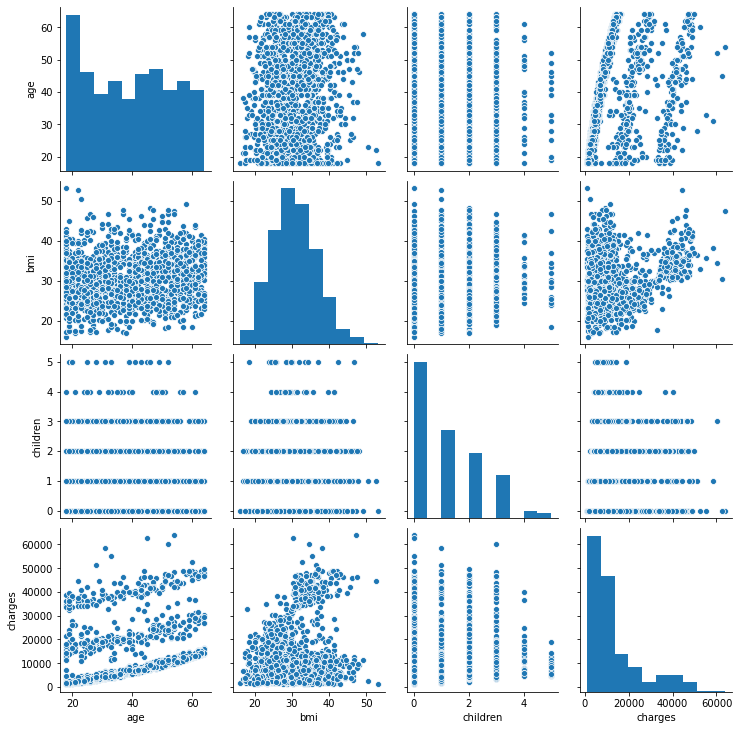

In [39]:
sns.pairplot(df)

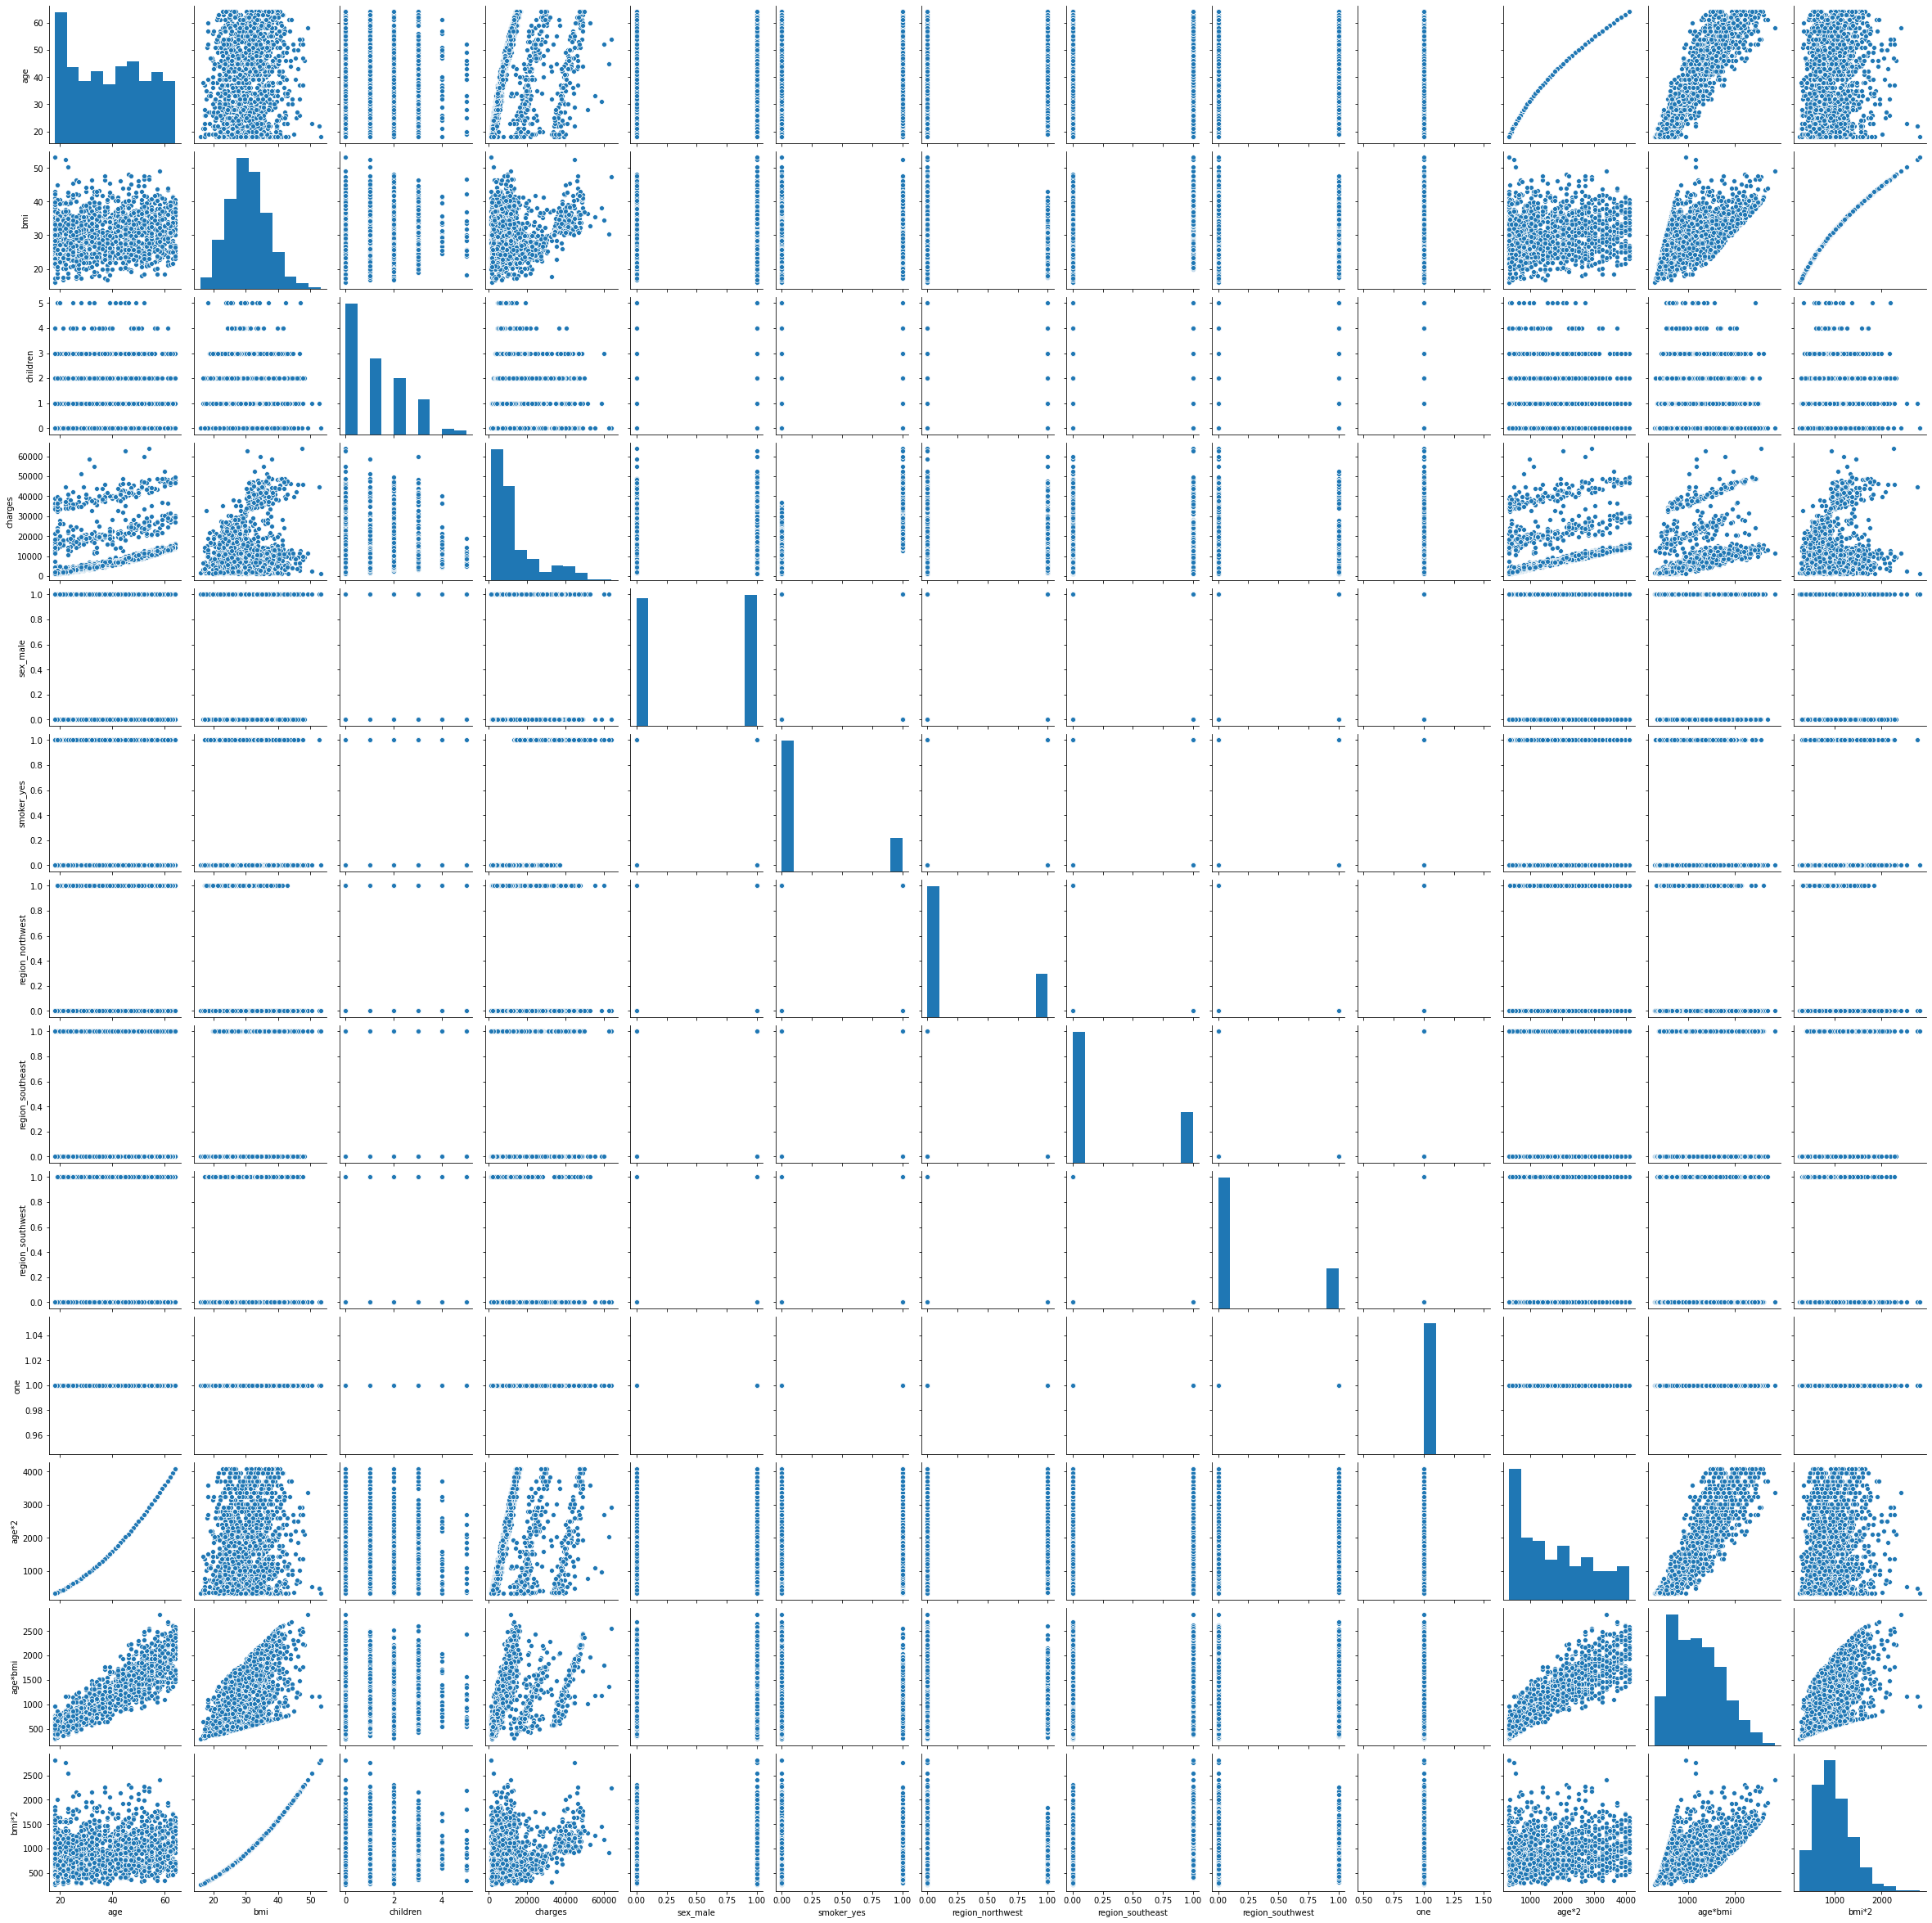

In [41]:
sns.pairplot(df_with_poly)